# K Means Clustering
- Unsupervised Learning 

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
# Sample data creation
np.random.seed(42)

data_1 = np.random.randn(100, 2) + np.array([5, 5])
data_2 = np.random.randn(100, 2) + np.array([-5, -5])
data_3 = np.random.randn(100, 2) + np.array([5, -5])

X = np.vstack([data_1, data_2, data_3])
X.shape

(300, 2)

In [87]:
df = pd.DataFrame(X)
df.head()

,0,1
0,5.496714,4.861736
1,5.647689,6.523030
2,4.765847,4.765863
3,6.579213,5.767435
4,4.530526,5.542560


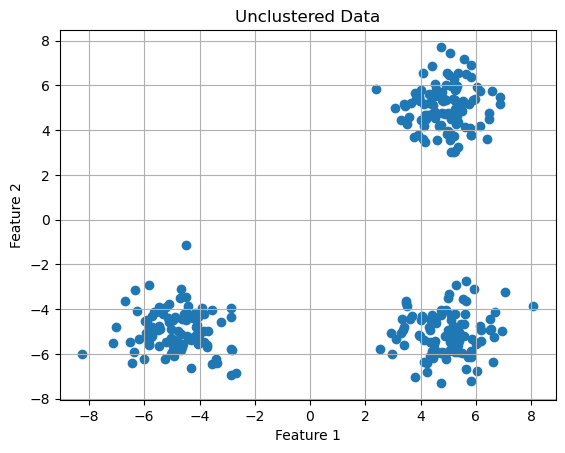

In [88]:
plt.scatter(X[:, 0], X[:, 1])
plt.title('Unclustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [89]:
K = 3 # number of cluster we want to find
n_samples = X.shape[0]

In [90]:
random_indices = np.random.choice(n_samples, K, replace=False)
centroids = X[random_indices, :]
print(f'Initial Random Centroids: \n{centroids}')

Initial Random Centroids: 
[[ 3.8086965   5.65655361]
 [ 4.45561728  5.11092259]
 [ 5.12029563 -4.48556117]]


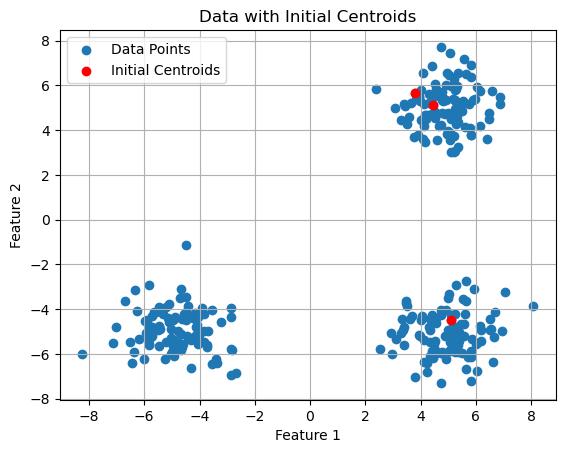

In [91]:
plt.scatter(X[:, 0], X[:, 1], label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', label='Initial Centroids')
plt.title('Data with Initial Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
def calc_dist(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [93]:
labels = np.zeros(n_samples)
for i, point in enumerate(X):
    distances = [calc_dist(point, centroid) for centroid in centroids]
    labels[i] = np.argmin(distances)

print('First 10 labels: ', labels[:10])

First 10 labels:  [1. 1. 1. 1. 1. 1. 1. 0. 0. 1.]


In [94]:
# Find new centroids
old_centroids = centroids.copy()

for k in range(K):
    points_in_cluster = X[labels == k]

    if points_in_cluster.shape[0] > 0:
        new_centroid = np.mean(points_in_cluster, axis=0)
        centroids[k] = new_centroid
        
print(f'Old Centoids: \n{old_centroids}')
print(f'New Centroids: \n{centroids}')

Old Centoids: 
[[ 3.8086965   5.65655361]
 [ 4.45561728  5.11092259]
 [ 5.12029563 -4.48556117]]
New Centroids: 
[[ 4.07086389  5.91599349]
 [ 5.10070168  4.79957429]
 [ 0.04160567 -5.04139252]]


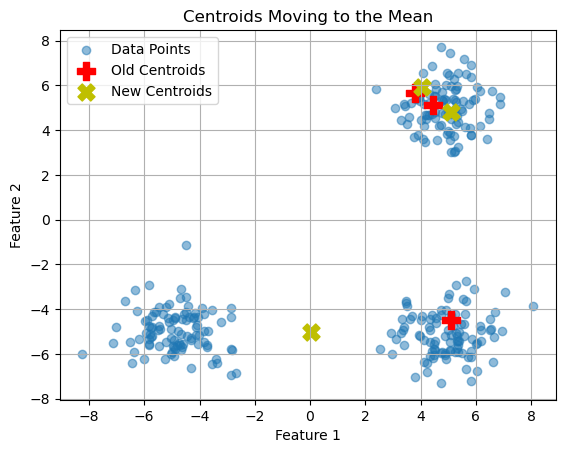

In [95]:
plt.scatter(X[:, 0], X[:, 1], label='Data Points', alpha=0.5)
plt.scatter(old_centroids[:, 0], old_centroids[:, 1], color='r', s=150, marker='P', label='Old Centroids')
plt.scatter(centroids[:, 0], centroids[:, 1], color='y', s=150, marker='X', label='New Centroids')
plt.title('Centroids Moving to the Mean')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

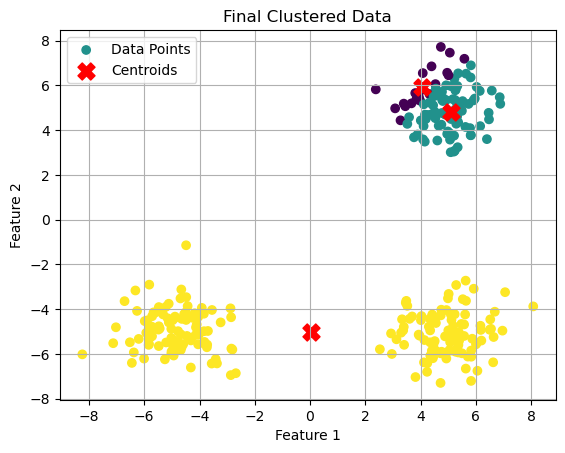

In [96]:
plt.scatter(X[:, 0], X[:, 1], c=labels, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], color='r', s=150, marker='X', label='Centroids')
plt.title('Final Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()